# Modelling DNA base sequence using Homogeneous Markov Chain

Consider the data in table given below, being cooccurrence statistic (i.e. counts) of all the possible transition between the four bases ($A, C, C$ and $T$) forming an observed human gene DNA base sequence. 

We will model the dynamics of the sequence using a homogeneous markov chain (HMC), estimating its parameters using these counts.

![](images/table.png)

First of all, we need to log the counts in the table in an array as follows and get the transition matrix $\mathbf{T}$. The transition matrix is the matrix of probabilities of transitions from one base to another. 

We will get the transition matrix by dividing the each row of the table by their corresponding sum. 

In [1]:
import numpy as np

X = np.array([[185, 74, 86, 171], [101, 41, 6, 115], [69, 45, 34, 78], [161, 103, 100, 202]])

# Transition matrix
T = X/np.reshape(np.sum(X, axis = 1), [4, 1])


In [2]:
from graphviz import Digraph

node_list = ['A', 'C', 'G', 'T']

G = Digraph()

for node in node_list:
    G.node(node, label = node)

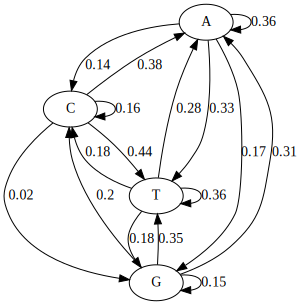

In [3]:
count = 0
for i in range(4):
    for j in range(4):
        G.edge(node_list[i], node_list[j], label = str(round(T[i, j], 2)))
           
G    

The above figure shows the markov chain with its state-space and transition probabilities of each base to another base.

Next, we would like to simulate this gene sequence by first specifying the initial probability vectors. We can assume that initial base of gene sequence is either of $A, C, G$ and $T$.

Let's consider the first base of gene-sequence is $A$, then the probability vector $p_{1A}$ can be written as 

$$p_{1A} = [1, 0, 0, 0 ]$$

where the first element of the probability vector represents the probability of the base being in state $A$ which is 100% for above case. Similarly 

$$p_{1C} = [0, 1, 0, 0 ]$$

$$p_{1G} = [0, 0, 1, 0 ]$$

$$p_{1T} = [0, 0, 0, 1 ]$$

Let's now simulate the gene sequence considering the first base of the gene sequence is $A$

In [4]:
# Initial probability vectors
p1A = np.array([1, 0, 0 , 0])
p1C = np.array([0, 1, 0 , 0])
p1G = np.array([0, 0, 1 , 0])
p1T = np.array([0, 0, 0 , 1])

In [5]:
# Simulate the sequence considerind initial base to be "A"
import random


state_space = [1, 2, 3, 4] # corresponding to A, C, G and T

tran_prob_vec = T[0, :] # Since first base is A

initial_state = state_space[0]

gene_sequence = [initial_state]

random.seed(0)

for _ in range(1571):
    
    U = random.uniform(0, 1) # random number from U(0, 1) using inverse sampling
    
    if(U <= sum(tran_prob_vec[0 : 1])):  
        gene_sequence.append(state_space[3])
        
    elif(sum(tran_prob_vec[0 : 1]) < U <= sum(tran_prob_vec[0 : 2])):       
        gene_sequence.append(state_space[2])
        
    elif(sum(tran_prob_vec[0 : 2]) < U <= sum(tran_prob_vec[0 : 3])):     
        gene_sequence.append(state_space[1])
    
    else:      
        gene_sequence.append(state_space[0])
        

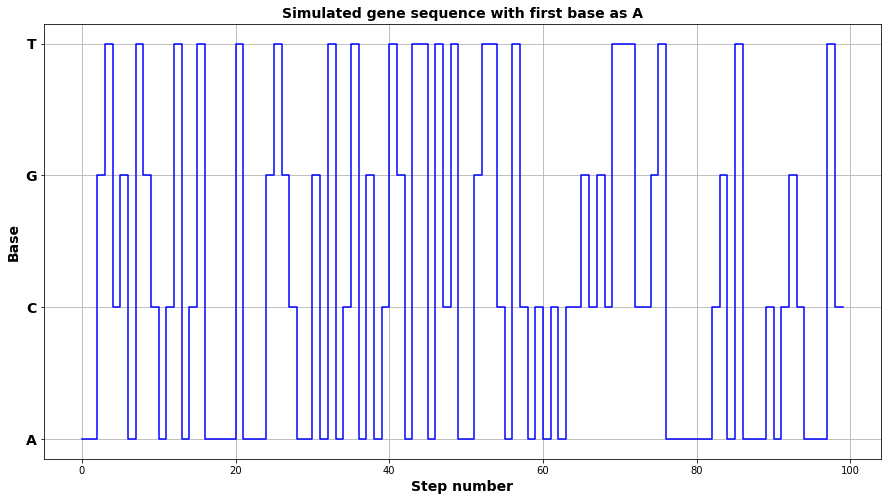

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = [15, 8])

x = np.arange(100)
ax = fig.add_subplot(1,1,1)
ax.step(x, gene_sequence[0 : 100], 'b')
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['A', 'C', 'G', 'T'], {'fontsize':14, 'fontweight': 'bold'})
ax.set_xlabel('Step number', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Base', fontsize = 14, fontweight = 'bold')
ax.set_title('Simulated gene sequence with first base as A', fontsize = 14, fontweight = 'bold')
ax.grid(True)

The above figure shows the simulated gene sequence with starting base as $A$. Similarly, the gene sequence can be simlated with other bases as first base. 

Next we would sequentially evaluate the marginal (i.e. total) probability vector of the state of the $i^{th}$ base $B_i, \ i \geq 1$. The marginal probability $P_i$ of $i^{th}$ state in a Markov chain is given as follows

$$P_i = P_0\times T^{i-1}$$

where $P_0$ is the initial probability vector. 

In [7]:
total_prob_A = [p1A] # Initial probability vector

for i in range(1, 50): # up to 50 states
    total_prob_A.append(np.matmul(p1A, np.linalg.matrix_power(T, i)))

Now let's change the initial probability vector to $[0, 1, 0, 0]$ i.e. the initial base is $C$ and now calculate the total probability of $i^{th}$ base

In [8]:
total_prob_C = [p1C] # Initial probability vector

for i in range(1, 50): # up to 50 states
    total_prob_C.append(np.matmul(p1C, np.linalg.matrix_power(T, i)))

Now let's plot these sequences

In [9]:
total_prob_A = np.array(total_prob_A)
total_prob_C = np.array(total_prob_C)

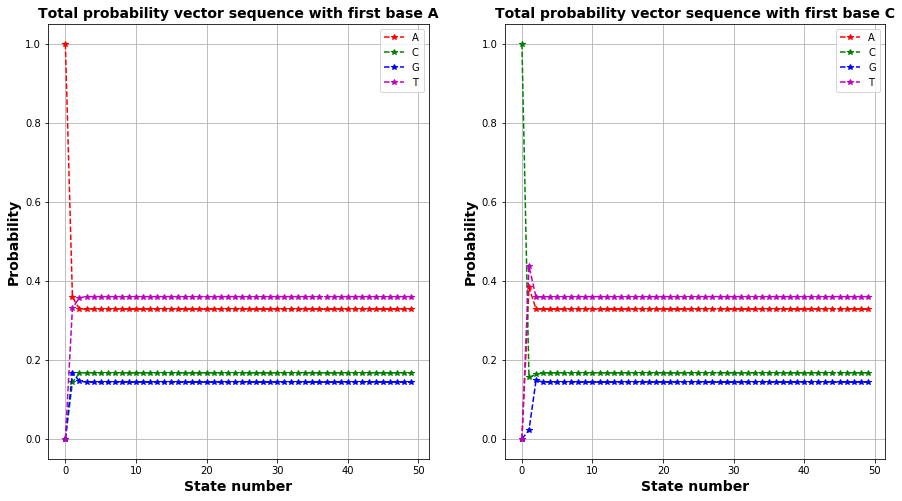

In [10]:
fig = plt.figure(figsize = [15, 8])

color = ['r', 'g', 'b', 'm']

x = np.arange(50)

ax1 = fig.add_subplot(1, 2, 1)
for i in range(4):   
    ax1.plot(x ,total_prob_A[:, i], linestyle= "--", marker = "*", color = color[i], label = node_list[i])
ax1.grid(True)
ax1.set_title('Total probability vector sequence with first base A', fontsize = 14, fontweight = 'bold')
ax1.set_xlabel('State number', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Probability', fontsize = 14, fontweight = 'bold')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
for i in range(4):   
    ax2.plot(x ,total_prob_C[:, i], linestyle= "--", marker = "*", color = color[i], label = node_list[i])
ax2.grid(True)
ax2.set_title('Total probability vector sequence with first base C', fontsize = 14, fontweight = 'bold')
ax2.set_xlabel('State number', fontsize = 14, fontweight = 'bold')
ax2.set_ylabel('Probability', fontsize = 14, fontweight = 'bold')
ax2.legend()

plt.show()

We can clearly see that, total probability of the state of Markov chain converges in long run i.e. it does not depend upon the initial state of the Markov chain. This is called ___staionarity___ propoery of homogeneous markov chain. 

Next, we are interested in finding the $k$-step ahead transition probability matrix $T_k$ of our homogeneous markov chain, which is given as follows

$$T_k = T^k$$

In [11]:
kstep_tran_matrix = []

for i in range(1, 20): # for 20 steps
    kstep_tran_matrix.append( np.linalg.matrix_power(T, i))
        

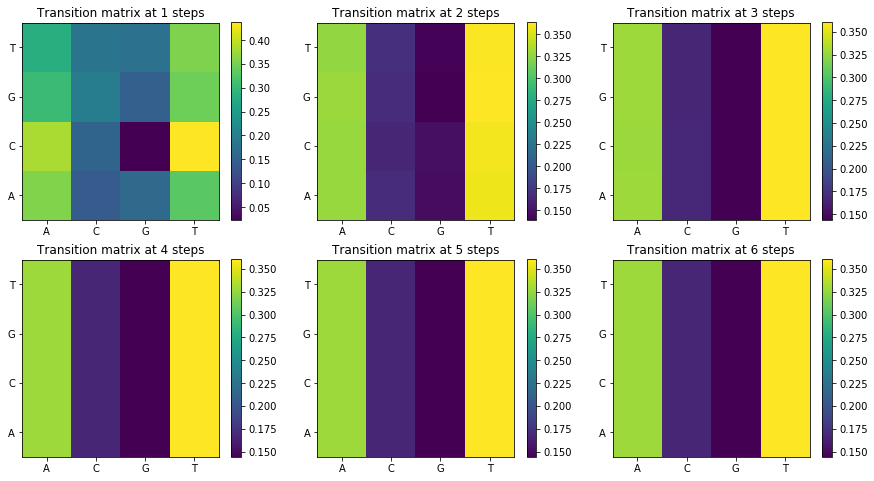

In [12]:
fig = plt.figure(figsize = [15, 8])

for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1 )
    im = ax.imshow(kstep_tran_matrix[i])
    ax.set_xticks(np.arange(4))
    ax.set_yticks(np.arange(4))
    ax.set_xticklabels(node_list)
    ax.set_yticklabels(node_list)
    ax.set_xlim([-0.5, 3.5])
    ax.set_ylim([-0.5, 3.5])
    cbar = ax.figure.colorbar(im, ax=ax)
    ax.set_title('Transition matrix at {} steps'.format(i + 1))

plt.show()

The above figure shows the heat map of $k$ step ahead transition matrix. We can see that transition matrix after few steps does not change which is responsible for the staionarity behaviour of the homogeneous Markov chain. The burn-in time, i.e. the time after which the transition matrix does not change is here $t = 3$.

## Empricial and parametric probability evaluation

The first problem is to evaluate the probability that the next 4 bases are all $A$s, if the current base is $A$. We need to find the  $\text{Pr}[B_k = A, \ (k = i + 1, i + 2, i + 3, i + 4)| B_i = A]$

In the gene sequence we need, $AAAAA$. We know that in a homogeneous Markov chain, the probability of $i^{th}$ state only depend upon the previous state $i - 1$. From the transition matrix, we know the transition probability of a base going from $A$ to $A$, we can evaluate the above probability as 

$$\text{Pr}[B_k = A, \ (k = i + 1, i + 2, i + 3, i + 4)| B_i = A] = P_{AA}\times P_{AA}\times P_{AA}\times P_{AA}$$

where $P_{AA}$ represents the probability of transition from base $A$ to $A$. 

In [13]:
print('The probability that the next 4 bases are all As given that the current base is A is {}'.format(T[0, 0]**4))


The probability that the next 4 bases are all As given that the current base is A is 0.01652296972494032


The second problem is to evaluate the probability that 4 step ahead base is $A$, if the current base is $A$. We need to find the  $\text{Pr}[B_{i+4} = A| B_i = A]$

In the gene sequence we need, $A$_ _ _ _$A$, where the dash can be any of the 4 bases. 

$$\text{Pr}[B_{i+4} = A| B_i = A] = T^4[0, 0]$$


In [14]:
print('The probability that the next 4 bases are all As given that the current base is A is {}'.format(np.linalg.matrix_power(T, 4)[0, 0]))


The probability that the next 4 bases are all As given that the current base is A is 0.3284609939289906


In [15]:
count = 0

for i in range(len(gene_sequence) - 5):
    if(gene_sequence[i] == 1 and gene_sequence[i + 1] == 1 and gene_sequence[i + 2] == 1 and gene_sequence[i + 3] == 1\
      and gene_sequence[i + 4] == 1):
        count += 1
print('The emprical probability that the next 4 bases are all As given that the current base is A is {}'.format(count/gene_sequence.count(1)))        
   

The emprical probability that the next 4 bases are all As given that the current base is A is 0.011320754716981131


In [16]:
count = 0

for i in range(len(gene_sequence) - 5):
    if(gene_sequence[i] == 1 and gene_sequence[i + 4] == 1):
        count += 1
print('The emprical probability that the next 4 bases are all As given that the current base is A is {}'.format(count/gene_sequence.count(1)))        


The emprical probability that the next 4 bases are all As given that the current base is A is 0.3264150943396226


So we can see that, the probabilites calculated using the given probability model and simulated Markov chain are almost same. 

Next, we would verify that the long-run (staitionary) behaviour of our simulated sequence is consistent with that of observed DNA sequence.

In [17]:
prA = gene_sequence.count(1)/len(gene_sequence)
prC = gene_sequence.count(2)/len(gene_sequence)
prG = gene_sequence.count(3)/len(gene_sequence)
prT = gene_sequence.count(4)/len(gene_sequence)

[prA, prC, prG, prT]

[0.3371501272264631,
 0.16157760814249364,
 0.14885496183206107,
 0.3524173027989822]

## References:

Avery, P. J., & Henderson, D. A. (1999). Fitting Markov chain models to discrete state series such as DNA sequences. *Journal of the Royal Statistical Society: Series C (Applied Statistics)*, 48(1), 53-61.